## Importing libraries and Data Preprocessing

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
df=pd.read_csv(r"C:\Users\kamat\Downloads\MWData\MWData\MW.csv")
df.columns=['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']
df

,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2..."
1,1,1,MW,FP1,1,889,"83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3..."
2,2,2,MW,FP1,4,1017,"19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-..."
3,3,3,MW,FP1,1,1017,"17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1..."
4,4,4,MW,FP1,8,952,"77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"138,135,123,96,59,38,11,16,44,67,70,73,67,33,4..."
67631,67631,67631,MW,FP1,-1,1024,"4,5,-7,-12,-11,-17,2,52,73,55,12,-22,-7,38,43,..."
67632,67632,67632,MW,FP1,-1,1024,"96,163,208,179,129,114,140,155,108,56,28,9,-8,..."
67633,67633,67633,MW,FP1,-1,1024,"-30,4,53,85,84,72,80,85,65,23,-26,-42,-56,-146..."


In [63]:
df['data'].dtype

dtype('O')

In [64]:
df["data"] =df["data"].apply(lambda str1:[float(x) for x in str1.split(",") if x.strip() != "" and x.strip()!="-"])

In [65]:
df

,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"[38.0, 48.0, 51.0, 44.0, 48.0, 56.0, 56.0, 41...."
1,1,1,MW,FP1,1,889,"[83.0, 74.0, 65.0, 65.0, 66.0, 55.0, 43.0, 25...."
2,2,2,MW,FP1,4,1017,"[19.0, 10.0, -2.0, -9.0, -5.0, 3.0, 8.0, 7.0, ..."
3,3,3,MW,FP1,1,1017,"[17.0, 29.0, 36.0, 26.0, 21.0, 17.0, 17.0, 13...."
4,4,4,MW,FP1,8,952,"[77.0, 74.0, 69.0, 70.0, 76.0, 75.0, 76.0, 75...."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[138.0, 135.0, 123.0, 96.0, 59.0, 38.0, 11.0, ..."
67631,67631,67631,MW,FP1,-1,1024,"[4.0, 5.0, -7.0, -12.0, -11.0, -17.0, 2.0, 52...."
67632,67632,67632,MW,FP1,-1,1024,"[96.0, 163.0, 208.0, 179.0, 129.0, 114.0, 140...."
67633,67633,67633,MW,FP1,-1,1024,"[-30.0, 4.0, 53.0, 85.0, 84.0, 72.0, 80.0, 85...."


## Normalizing the data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['data']=df['data'].apply(lambda x:scaler.fit_transform([[i] for i in x]))

In [68]:
df

,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"[[-0.020167413386099172], [0.1724171820473551]..."
1,1,1,MW,FP1,1,889,"[[0.8764881739894702], [0.7345290266192324], [..."
2,2,2,MW,FP1,4,1017,"[[-0.3853552100090173], [-0.5915975347203105],..."
3,3,3,MW,FP1,1,1017,"[[-0.36952554000755283], [-0.0764030382037066]..."
4,4,4,MW,FP1,8,952,"[[1.0297024272592137], [0.9595992059897902], [..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[[0.5596317621858226], [0.5429868270209904], [..."
67631,67631,67631,MW,FP1,-1,1024,"[[-0.37659375718571414], [-0.36424958281445385..."
67632,67632,67632,MW,FP1,-1,1024,"[[0.8411452930862484], [1.736682238013567], [2..."
67633,67633,67633,MW,FP1,-1,1024,"[[-0.5376089847241169], [-0.21829044625558727]..."


In [69]:
df['data']=df['data'].apply(lambda x:x.reshape(-1))
df

,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"[-0.020167413386099172, 0.1724171820473551, 0...."
1,1,1,MW,FP1,1,889,"[0.8764881739894702, 0.7345290266192324, 0.592..."
2,2,2,MW,FP1,4,1017,"[-0.3853552100090173, -0.5915975347203105, -0...."
3,3,3,MW,FP1,1,1017,"[-0.36952554000755283, -0.0764030382037066, 0...."
4,4,4,MW,FP1,8,952,"[1.0297024272592137, 0.9595992059897902, 0.842..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[0.5596317621858226, 0.5429868270209904, 0.476..."
67631,67631,67631,MW,FP1,-1,1024,"[-0.37659375718571414, -0.36424958281445385, -..."
67632,67632,67632,MW,FP1,-1,1024,"[0.8411452930862484, 1.736682238013567, 2.3381..."
67633,67633,67633,MW,FP1,-1,1024,"[-0.5376089847241169, -0.21829044625558727, 0...."


## Applying Linear Interpolation

In [70]:
def resample(array):
     input_indices = np.linspace(0, len(array)-1, len(array))
     resampled_indices =np.linspace(0,len(array)-1,1024)
     interpolator =interp1d(input_indices,array,'linear')
     resampled_array =interpolator(resampled_indices)
     return resampled_array
     
df['data']=df['data'].apply(lambda x:resample(x))
df


,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"[-0.020167413386099172, 0.17109939889189646, 0..."
1,1,1,MW,FP1,1,889,"[0.8764881739894702, 0.7532626384422842, 0.630..."
2,2,2,MW,FP1,4,1017,"[-0.3853552100090173, -0.5901862969168119, -0...."
3,3,3,MW,FP1,1,1017,"[-0.36952554000755283, -0.07840876402250124, 0..."
4,4,4,MW,FP1,8,952,"[1.0297024272592137, 0.9645331570468757, 0.859..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[0.5596317621858226, 0.5429868270209904, 0.476..."
67631,67631,67631,MW,FP1,-1,1024,"[-0.37659375718571414, -0.36424958281445385, -..."
67632,67632,67632,MW,FP1,-1,1024,"[0.8411452930862484, 1.736682238013567, 2.3381..."
67633,67633,67633,MW,FP1,-1,1024,"[-0.5376089847241169, -0.5160713706925152, -0...."


## Plotting the time domain signal

Text(0, 0.5, 'Amplitude')

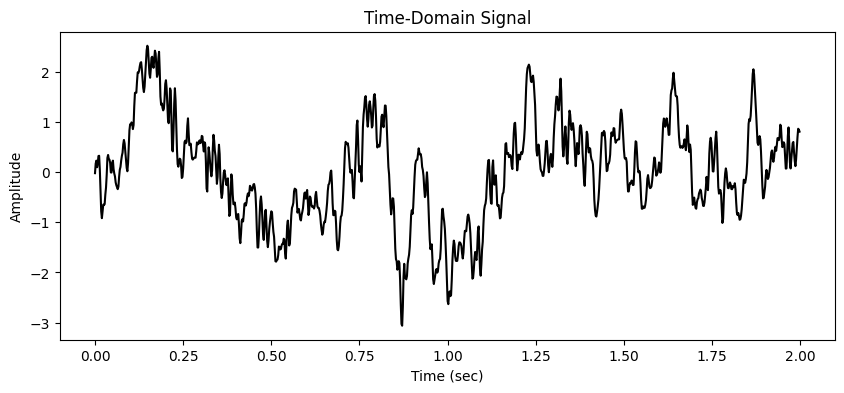

In [71]:
fs=1024//2
t=np.arange(0,1024)/fs
plt.figure(figsize=(10,4))
plt.plot(t,df.loc[0,'data'],'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")


In [72]:
df['size']=1024
df

,id,event_id,device,channel,code,size,data
0,0,0,MW,FP1,0,1024,"[-0.020167413386099172, 0.17109939889189646, 0..."
1,1,1,MW,FP1,1,1024,"[0.8764881739894702, 0.7532626384422842, 0.630..."
2,2,2,MW,FP1,4,1024,"[-0.3853552100090173, -0.5901862969168119, -0...."
3,3,3,MW,FP1,1,1024,"[-0.36952554000755283, -0.07840876402250124, 0..."
4,4,4,MW,FP1,8,1024,"[1.0297024272592137, 0.9645331570468757, 0.859..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[0.5596317621858226, 0.5429868270209904, 0.476..."
67631,67631,67631,MW,FP1,-1,1024,"[-0.37659375718571414, -0.36424958281445385, -..."
67632,67632,67632,MW,FP1,-1,1024,"[0.8411452930862484, 1.736682238013567, 2.3381..."
67633,67633,67633,MW,FP1,-1,1024,"[-0.5376089847241169, -0.5160713706925152, -0...."


## Using power spectrum for feature extraction

In [73]:
def power_spectrum(array,index):
    autocorr = np.correlate(array, array, mode='full')
    power_autocorr = np.abs(np.fft.fft(autocorr))
    freqs = np.fft.fftfreq(len(power_autocorr), 1/fs)
    if(index):
        return power_autocorr
    else:
        return freqs

df['data']=df['data'].apply(lambda x:power_spectrum(x,1))
df['freqs']=df['data'].apply(lambda x:power_spectrum(x,0))
df

,id,event_id,device,channel,code,size,data,freqs
0,0,0,MW,FP1,0,1024,"[0.0006193599325570176, 15228.224992931457, 94...","[0.0, 0.12509161983874909, 0.25018323967749817..."
1,1,1,MW,FP1,1,1024,"[0.19569463540551624, 6370.988656452108, 55227...","[0.0, 0.12509161983874909, 0.25018323967749817..."
2,2,2,MW,FP1,4,1024,"[2.2281376004684716e-05, 801.6511941056838, 21...","[0.0, 0.12509161983874909, 0.25018323967749817..."
3,3,3,MW,FP1,1,1024,"[0.001058622838854717, 942.9794858034339, 1585...","[0.0, 0.12509161983874909, 0.25018323967749817..."
4,4,4,MW,FP1,8,1024,"[0.02400686724354273, 46269.41771865757, 88496...","[0.0, 0.12509161983874909, 0.25018323967749817..."
...,...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"[2.9558577807620168e-12, 993.470821917502, 613...","[0.0, 0.12509161983874909, 0.25018323967749817..."
67631,67631,67631,MW,FP1,-1,1024,"[4.547473508864641e-12, 16863.054487617526, 21...","[0.0, 0.12509161983874909, 0.25018323967749817..."
67632,67632,67632,MW,FP1,-1,1024,"[4.320099833421409e-12, 204.34232701304944, 77...","[0.0, 0.12509161983874909, 0.25018323967749817..."
67633,67633,67633,MW,FP1,-1,1024,"[39.39770983632525, 20036.376890986732, 100700...","[0.0, 0.12509161983874909, 0.25018323967749817..."


## Visualizing the power spectrum

(0.0, 25.0)

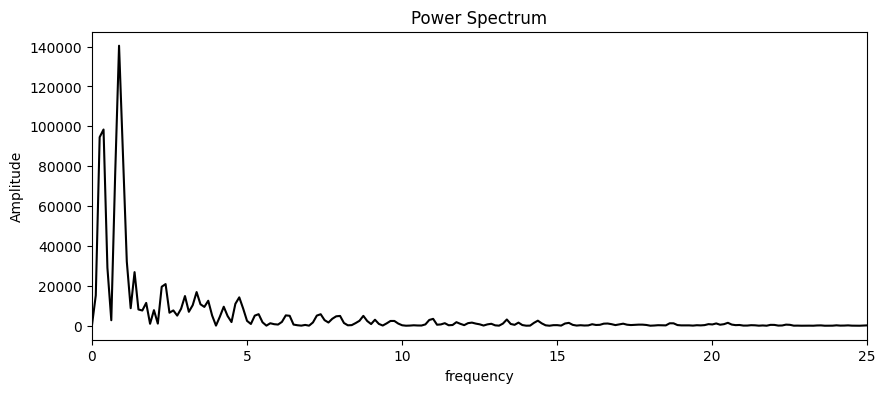

In [76]:
plt.figure(figsize=(10,4))
plt.plot(df.loc[0,'freqs'][0:512],df.loc[0,'data'][0:512],'k')
plt.title("Power Spectrum")
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.xlim(0,25)

In [77]:
x=[]
y=[]
for i in range(67635):
    x.append(
        np.array(df.loc[i,'data'][:512])
    )
    y.append(df['code'][i])
x = np.array(x)
y = np.array(y)

In [78]:
x.shape

(67635, 512)

In [79]:
y.shape

(67635,)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Applying knn for classification

In [28]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=17,weights='distance')
knn.fit(x_train,y_train)
y_predicted=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.19109928291565018